In [1]:
import numpy
from matplotlib import pyplot
import matplotlib.cm as cm
%matplotlib inline
from matplotlib import animation
from IPython.display import HTML

The Equations for this problem are;

$\frac{\partial u}{\partial t} = D_u \bigtriangledown^2u - uv^2 + F(1-u) $

$\frac{\partial v}{\partial t} = D_v \bigtriangledown^2v - uv^2 + (F+K)v$

$\bigtriangledown^2u = \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2}$



In [2]:
uvinitial = numpy.load('./uvinitial.npz')
U = uvinitial['U']
V = uvinitial['V']

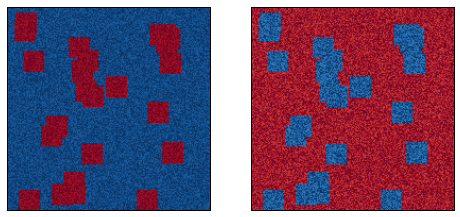

In [3]:
fig = pyplot.figure(figsize=(8,5))
pyplot.subplot(121)
pyplot.imshow(U, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);
pyplot.subplot(122)
pyplot.imshow(V, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);

In [4]:
#Given
n = 192

Du, Dv, F, k = 0.00016, 0.00008, 0.035, 0.065 # Bacteria 1 

dh = 5/(n-1)

T = 8000

dt = .9 * dh**2 / (4*max(Du,Dv))

nt = int(T/dt)

In [5]:
def ftcs(T,Du,Dv,F,k,dt,nt,dh,U,V,n):
  
    for tstep in range(nt):
        un = U.copy()
        vn = V.copy()  
        
        U[1:-1,1:-1] = un[1:-1,1:-1] +dt*(Du*(un[:-2,1:-1]+un[2:,1:-1]-2*un[1:-1,1:-1])/(dh*dh)+\
                    Du*(un[1:-1,:-2]+un[1:-1,2:]-2*un[1:-1,1:-1])/(dh*dh)-un[1:-1,1:-1]*vn[1:-1,1:-1]*vn[1:-1,1:-1]+\
                    +F*(1-un[1:-1,1:-1]))
            
        V[1:-1,1:-1] = vn[1:-1,1:-1]+ dt*(Dv*(vn[:-2,1:-1]+vn[2:,1:-1]-2*(vn[1:-1,1:-1]))/(dh*dh)+\
                Dv*(vn[1:-1,:-2]+vn[1:-1,2:]-2*vn[1:-1,1:-1])/(dh*dh)+un[1:-1,1:-1]*vn[1:-1,1:-1]*vn[1:-1,1:-1]+\
                -(F+k)*(vn[1:-1,1:-1]))
           
          
            
        # Boundary conditions
        
        U[0,:]=U[1,:]
        U[-1,:]=U[-2,:]
        U[:,0]=U[:,1]
        U[:,-1]=U[:,-2]
        
        V[0,:]=V[1,:]
        V[-1,:]=V[-2,:]
        V[:,0]=V[:,1]
        V[:,-1]=V[:,-2]
        
        
        
    return U,V    
    

In [6]:
U,V = ftcs(T, Du, Dv, F, k, dt, nt, dh, U, V, n)
print (numpy.round(U[100,::40],4))

[ 0.9247  0.8501  0.6682  0.902   0.904 ]


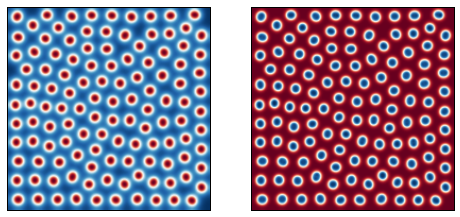

In [12]:
fig = pyplot.figure(figsize=(8,5))
pyplot.subplot(121)
pyplot.imshow(U, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);
pyplot.subplot(122)
pyplot.imshow(V, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);

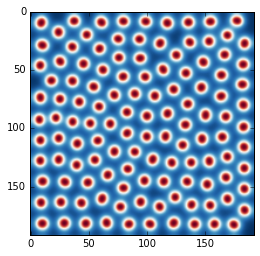

In [17]:
im = pyplot.imshow(U, cmap = cm.RdBu)

In [18]:
def init():
    im.set_data(U)
    return im,

def animate(data):
    im.set_array(data)
    return im,

In [19]:
anim= animation.FuncAnimation(fig, animate, init_func=init, frames=U, interval=1)

In [20]:
HTML(anim.to_html5_video())

TypeError: Invalid dimensions for image data